In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from PIL import Image
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications import VGG16, InceptionResNetV2 , VGG19
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from PIL import ImageFile
from keras.models import load_model
from sklearn.metrics import accuracy_score

In [3]:
ImageFile.LOAD_TRUNCATED_IMAGES = True
train_dir = '/content/drive/MyDrive/dataset/train'
test_dir = '/content/drive/MyDrive/dataset/test'

In [4]:
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                  horizontal_flip = True,
                                  rescale = 1./255,
                                  validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale =1./255,
                                 validation_split = 0.2)

In [5]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                   target_size = (224,224),
                                                   color_mode = 'rgb',
                                                   class_mode = 'categorical',
                                                    batch_size = 866,
                                                   subset = 'training')
validation_generator = test_datagen.flow_from_directory(directory = test_dir,
                                                       target_size = (224,224),
                                                       color_mode = 'rgb',
                                                       class_mode = 'categorical',
                                                       batch_size = 92,
                                                       subset = 'validation')

Found 1966 images belonging to 3 classes.
Found 221 images belonging to 3 classes.


In [6]:
x_train,y_train = next(train_generator)
x_test,y_test = next(validation_generator)

In [7]:
model1 = load_model('/content/drive/MyDrive/dataset/model1_cnn.h5')
model2 = load_model('/content/drive/MyDrive/dataset/model2_cnn_dropouts.h5')
model3 = load_model('/content/drive/MyDrive/dataset/model4_SVM.h5')

In [8]:
models = [model1,model2,model3]

preds = [model.predict(x_test) for model in models]
preds = np.array(preds)

In [9]:

def predict_classes(model,x_test):
  pred = preds[model]
  return np.argmax(pred,axis =1)

prediction1 = predict_classes(0,x_test)
prediction2 =predict_classes(1,x_test)
prediction3 = predict_classes(2,x_test)


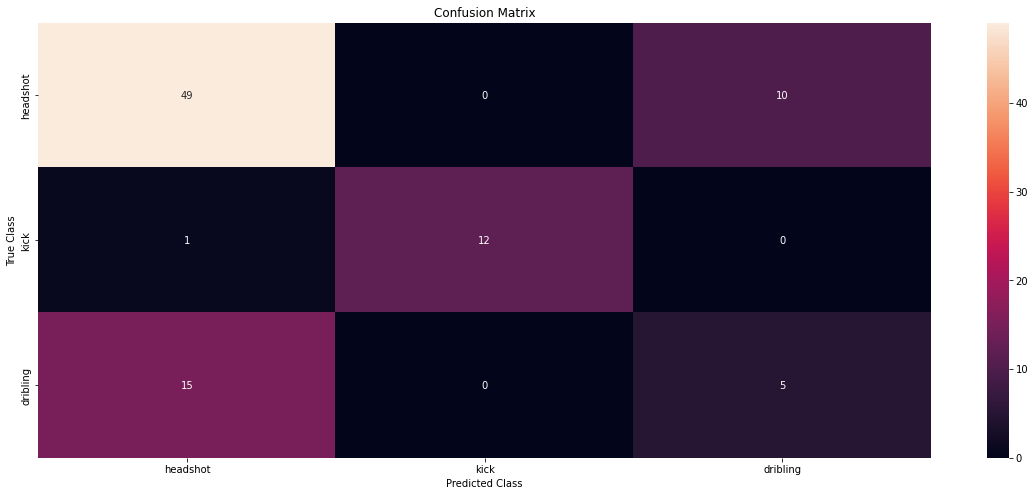

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
class_names = []
for dir in os.listdir(train_dir):
    class_names.append(dir) # append the folder name, the class
# define the matrix with the real classes and the predicted
m = confusion_matrix(np.argmax(y_test,axis =1), prediction1)
# the labels for the plot
labels = class_names
plt.figure(figsize=(20, 8))
# create the plot
heatmap = sns.heatmap(m, xticklabels=labels, yticklabels=labels, annot=True, fmt='d', color='blue')
# labels for the axes
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

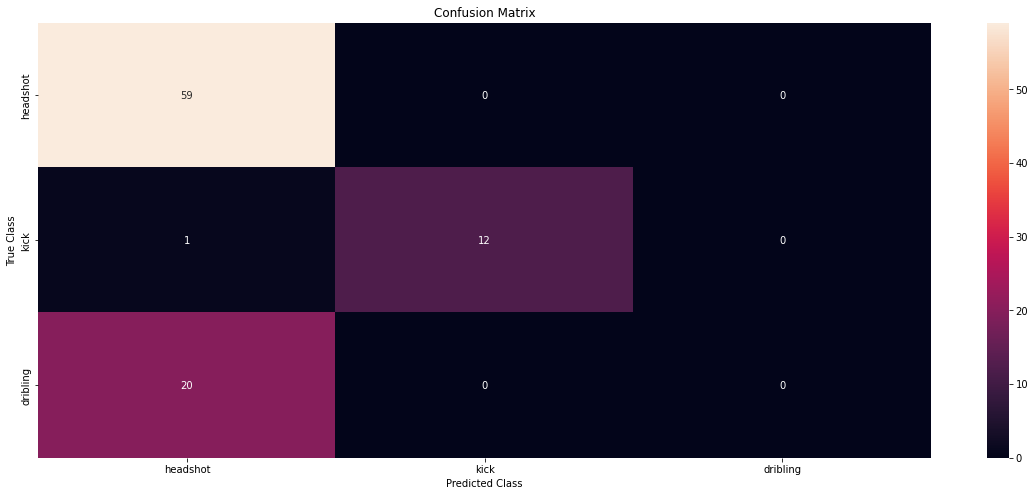

In [16]:
m = confusion_matrix(np.argmax(y_test,axis =1), prediction2)
# the labels for the plot
labels = class_names
plt.figure(figsize=(20, 8))
# create the plot
heatmap = sns.heatmap(m, xticklabels=labels, yticklabels=labels, annot=True, fmt='d', color='blue')
# labels for the axes
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

## **Averaging**

In [11]:
summed = np.sum(preds,axis = 0)
avg_ensemble_prediction = summed/3
avg_ensemble_prediction = np.argmax(avg_ensemble_prediction,axis=1)
accuracy_1 = accuracy_score(np.argmax(y_test,axis=1),prediction1)
accuracy_2 = accuracy_score(np.argmax(y_test,axis=1),prediction2)
accuracy_3 = accuracy_score(np.argmax(y_test,axis=1),prediction3)
avg_ensemble_accuracy = accuracy_score(np.argmax(y_test,axis=1),avg_ensemble_prediction)


print(f'Individual Accuracies - \n\nModel 1 : {accuracy_1}\nModel 2 : {accuracy_2}\nModel 3 : {accuracy_3}\n\n Ensemble Accuracy with averaging: {avg_ensemble_accuracy}')


Individual Accuracies - 

Model 1 : 0.717391304347826
Model 2 : 0.7717391304347826
Model 3 : 0.6413043478260869

 Ensemble Accuracy with averaging: 0.7717391304347826


## **Weighted Averaging**

In [12]:
weights = [0.4,0.4,0.4]
weighted_preds = np.tensordot(preds,weights,((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds,axis=1)
wt_avg_ensemble_accuracy = accuracy_score(np.argmax(y_test,axis=1),weighted_ensemble_prediction)

print(f'Individual Accuracies - \n\nModel 1 : {accuracy_1}\nModel 2 : {accuracy_2}\nModel 3 : {accuracy_3}n\n Ensemble Accuracy with weighted averaging: {wt_avg_ensemble_accuracy}')



Individual Accuracies - 

Model 1 : 0.717391304347826
Model 2 : 0.7717391304347826
Model 3 : 0.6413043478260869n
 Ensemble Accuracy with weighted averaging: 0.7717391304347826


##**Choose max predicted** 

In [17]:
from statistics import mode
max_voted_predictions = []
def choose_max_voted(li,fallback):
  m = 0
  try:
    m = mode(li)
    return m
  except:
    m = fallback
    return m
for i in range(prediction1.size):
  max_voted_predictions.append(choose_max_voted([prediction1[i],prediction2[i],prediction3[i]],prediction3[i]))

max_voted_accuracy= accuracy_score(np.argmax(y_test,axis=1),max_voted_predictions)

print(f'Individual Accuracies - \n\nModel 1 : {accuracy_1}\nModel 2 : {accuracy_2}\nModel 3 : {accuracy_3}\n\n Ensemble Accuracy with max voting: {wt_avg_ensemble_accuracy}')


Individual Accuracies - 

Model 1 : 0.717391304347826
Model 2 : 0.7717391304347826
Model 3 : 0.6413043478260869

 Ensemble Accuracy with max voting: 0.7717391304347826
